## Get information on database tables

In [2]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("factbook.db")
q = "SELECT * FROM sqlite_master WHERE type ='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


## Return First 5 rows of facts table

In [3]:
q2 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q2, conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Summary Statistics

In [4]:
q3 = "SELECT MIN(population) pop_min, MAX(population) pop_max, MIN(population_growth) pop_grwth_min, MAX(population_growth) pop_grwth_max FROM facts;"
pd.read_sql_query(q3,conn)

,pop_min,pop_max,pop_grwth_min,pop_grwth_max
0,0,7256490011,0.0,4.02


## Countrie(s) with population of zero

In [5]:
q4 = "SELECT * FROM facts WHERE population == (SELECT MIN(population) FROM facts);"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


## Countrie(s) with population of 7.2 Billion

In [6]:
q5 = "SELECT * FROM facts WHERE population == (SELECT MAX(population) FROM facts);"
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


Country with highest population growth is 4 times the population growth of the world.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb625077898>,
      dtype=object)

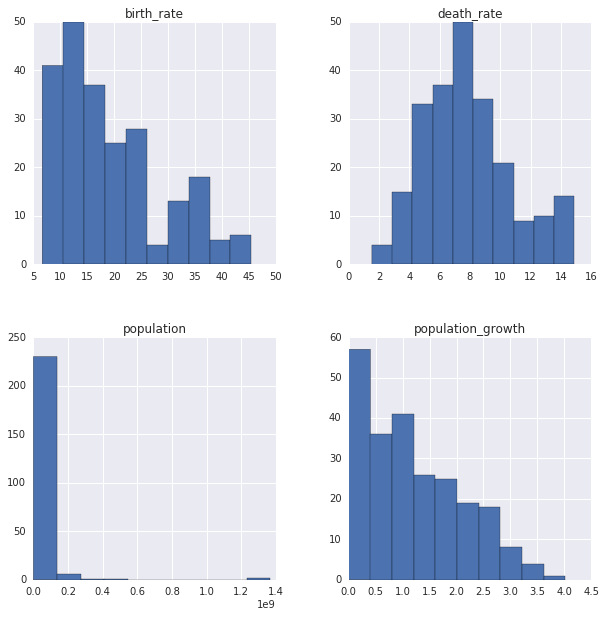

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
q6 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population != (SELECT MAX(population) FROM facts) AND population != (SELECT MIN(population) FROM facts);"
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pd.read_sql_query(q6, conn).hist(ax=ax)


## Which Countries have highest Population Density?

In [8]:
q7 = "SELECT name, CAST(population/area_land as Float) pop_density FROM facts ORDER BY pop_density DESC LIMIT 25"
pd.read_sql_query(q7, conn)

,name,pop_density
0,Macau,21168.0
1,Monaco,15267.0
2,Singapore,8259.0
3,Hong Kong,6655.0
4,Gaza Strip,5191.0
5,Gibraltar,4876.0
6,Bahrain,1771.0
7,Maldives,1319.0
8,Malta,1310.0
9,Bermuda,1299.0


Macau is the most densely populated country in the world. There are quite a number of small islands in the top 25 most densely populated countries in the world most of which have a tropical climate.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb622d06358>]],
      dtype=object)

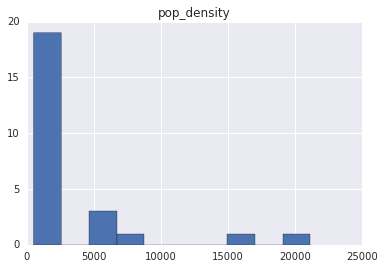

In [9]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot()
pd.read_sql_query(q7, conn).hist(ax=ax)

## Highest Ratios of water to land

In [10]:
q8 = "SELECT name, CAST(area_water/area_land as Float) water_to_land FROM facts ORDER BY water_to_land DESC LIMIT 25;"
pd.read_sql_query(q8, conn)

,name,water_to_land
0,British Indian Ocean Territory,905.0
1,Virgin Islands,4.0
2,Afghanistan,0.0
3,Albania,0.0
4,Algeria,0.0
5,Andorra,0.0
6,Angola,0.0
7,Antigua and Barbuda,0.0
8,Argentina,0.0
9,Armenia,0.0


British Indian Ocean Territory has the largest ratio of water to land. It is a territory comprising approximately 1000 small islands over hundreds of thousands of square miles of ocean. It has a ratio of 905 with the next closest ratio being 4.

In [11]:
q9 ="SELECT name, area_water, area_land FROM facts WHERE area_water > area_land ORDER BY area_water DESC"
pd.read_sql_query(q9, conn)

,name,area_water,area_land
0,British Indian Ocean Territory,54340,60
1,Virgin Islands,1564,346


## Is there a correlation between country size and migration rate?

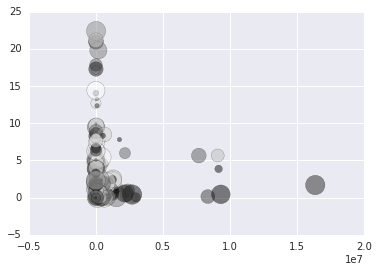

In [30]:
import numpy as np
np.random.seed(19680801)

q10 ="SELECT area_land, migration_rate FROM facts;"
df =pd.read_sql_query(q10, conn)
N=len(df.index)
colors = np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(df.area_land,df.migration_rate,s=area, c=colors, alpha=0.5)


### Findings
The data suggests a negative correlation between a country's land area and migration rate. All countries with migration rates greater than 8 have small  land areas. All countries with larger land areas have migration rates of 6 or lower. This can be explained by the fact that most countries with lower land areas have lower ability to provide economically for their people leading persons to migrate to other countries where opportunities are plentiful.
